# MDS with diodon - an elementary tutorial

This is an elementary tutorial for PCA with Diodon.

## How to run a PCA: a minimalist program

The tutorial programm for running MDS in this section is very short, and given here as a first step. It will be explained step by step along this notebok. Some developments with various options will be presented. The dataset used in this tutorial is `guiana_trees`. 


```Python  

# importing library
import pydiodon as dio 

# loading dataset with function load_dataset() of pydiodon
Dis, rn, cn = dio.load_dataset("guiana_trees")

# running MDS with function mds() of pydiodon
X, S = dio.mds(Dis)

```
It is followed by a few functions for plotting the results

```Python

# plotting the results
dio.plot_eig(S)                           # plotting eigenvalues
dio.plot_components_scatter(X)            # plotting components
dio.plot_components_splines(X, n_axis=30) # plotting parallel coordinates

```

#### Here are some comments 
- first step is to import pydiodon
- second step is to load a data set; here, it is a dataset given as an example for pydiodon in companion git `diodon_companion` (see section install of the readme of pydiodon gitlab).
- third step is the core of the analysis: running MDS on the dataset
- last steps are for displaying classical plots for visualising the resut.   

These steps are detailed in following sections. It will be useful to look as well at the online documentation available at https://diodon.gitlabpages.inria.fr/pydiodon

## Importing pydiodon

In [1]:
import pydiodon as dio

loading pydiodon - version 23.01.28


## Dataset

### Presentation

The dataset analyzed here is a $1,458 \times 1,458$ matrix of dissimilarities between molecular markers of trees in French Guiana from a study on barcopding Amazonian trees. See  [guiana trees](https://doi.org/10.15454/XSJ079) for a presentation of the dataset. Note that the dataset is available in the git `data4test` but with another suffix (.sw.dis). So, you are advised to load the dataset with the function load_dataset() in the library.

### Loading 

First load the dataset by using the function load_dataset(). The name of the dataset is `guiana_trees`. As it is a set of dissimilarities, it is named `Dis`. These are pairwise Smith-Waterman scores of local alignment between molecular markers of taxonomic interest. 

In [2]:
Dis, rn, cn = dio.load_dataset("guiana_trees")

dataset guiana_trees loaded, with 1458 rows and 1458 columns.


Now,  
- the dissimilarity array is numpy array Dis
- the rownames and column names are respectively in rn and cn. As the array is a dissimilarity array, they are similar. They are the sequence identifiers.

## Running the MDS

In [3]:
X, S = dio.mds(Dis)

732 positive eigenvalues


## Displaying the results

### Plotting the components

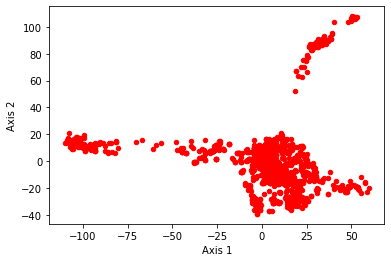

In [4]:
dio.plot_components_scatter(X)

### Plotting the eigenvalues

-> pydiodon:plot_eig()


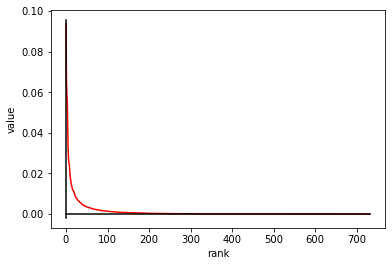

In [5]:
dio.plot_eig(S)

We see that most of the inertia of the point cloud is concentrated in the first axis (the $x$ axis is the ranks of the eigenvalues, and $y$ axis is the fraction of the inertia carried by each axis, in decreasing order). We just adjust the call to dio.plot_eig() for a clearer display. Therefore, we add two arguments:

- $k=50$ to specify we wish to plot the 50 first eigenvalues only (default value is $k=-1$, display all)
- $cum=True$ to specify we wish to plot the cumulated inetrtia (default value is Flase for plotting the inertia per axis)

-> pydiodon:plot_eig()


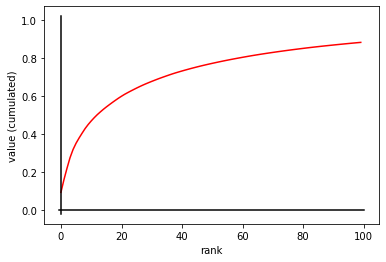

In [6]:
dio.plot_eig(S, k=100, cum=True)

In [7]:
dio.plot_eig(S, k=30, cum=True, pr=True, x11=False)

-> pydiodon:plot_eig()
Cumulated fractions of the inertia:
0.094 ; 0.16 ; 0.22 ; 0.276 ; 0.319 ; 0.352 ; 0.38 ; 0.405 ; 0.429 ; 0.45 ; 0.469 ; 0.486 ; 0.502 ; 0.516 ; 0.53 ; 0.543 ; 0.555 ; 0.567 ; 0.578 ; 0.589 ; 0.599 ; 0.609 ; 0.618 ; 0.626 ; 0.634 ; 0.642 ; 0.65 ; 0.657 ; 0.664 ; 0.671


One sees that the plane $(1,2)$ of the point cloud represents only $16 \%$ of the inertia of the cloud. Hence, studies on  its shape should take into account more dimensions. This can be done with visualization of the point cloud with function plot_components_splines() which implements parallel coordinates.

### Parallel coordinates

Parallel coordinates is a way to visualize simultaneously several coordinates of
a point clouds in a high dimensional space. Let us suppose we have a point
cloud $X$ of $n$ points with coordinate on axis $j$ for point $i$ being $x_{ij}$ , and that
we wish to visualize coordinates from 1 to $p$. To do this, we set a plot with
labels 1 to $p$ on $x$ axis. Each point $i \in \{1, . . . , n\}$ is represented by a curve
running through all points $(j, x_{ij})$  with $j \in \{1, . . . , p\}. The curves
are smoothed with cubic splines (hence the name of the method). See [parallel coordinates](https:
//en.wikipedia.org/wiki/Parallel_coordinates) for further information on
this method.

Let us start with the visualisation of variatons of 30 first coordinates ($67 \%$ of the inertia). On can see that several items (one item is one curve) have significant coodinates even on axis with large rank.  

[pydiodon]:[plot_components_splines()]


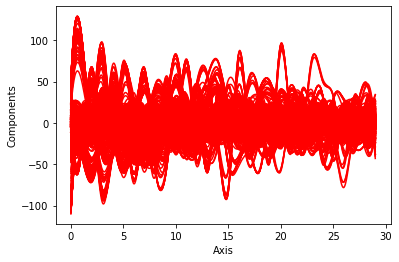

In [8]:
dio.plot_components_splines(X, n_axis=30)

To get a better idea of the concentration of the coordinates on the first xis with more details than just the cumulated fractions of inertia from eigenvalues, let us visualize all axis, by

[pydiodon]:[plot_components_splines()]


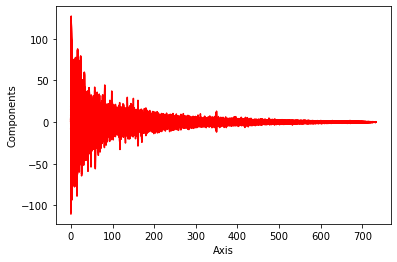

In [9]:
dio.plot_components_splines(X)

One can see that the dispersion around the centroid of the cloud (here, $(0, \ldots,0)$) decreases smoothly, and that we have to wait for large ranks for the coordinates to be non significant.

## References 

### For MDS

A. J. Izenman. Modern Multivariate Statistical Techniques. Springer, NY, 2008.


### For softwares¶ 
the python library is called pydiodon and can be downloaded from https://gitlab.inria.fr/diodon/pydiodon

## Useful companions:

Useful companions to run this notebook are:

**why it works:** the presentation of the methods from a linear algebra viewpoint, available at https://arxiv.org/abs/2209.13597   
**how it works:**  the online documentation of pydiodon, available at https://diodon.gitlabpages.inria.fr/pydiodon



### Authors
Alain Franc   
Jean-Marc Frigerio

### Contributors¶
Olivier Coulaud   
Rémy Peressoni   
Florent Pruvost   

### Contact and maintainer
Alain Franc, alain.franc@inrae.fr

# That's all, folks!